# Entropy and Mutual Information

Let's talk about `entropy` and `mutual information`. Entropy is understood in a couple of different ways. From a lay perspective, entropy is the magnitude of surprise; when something has a high level of surprise, then it has high entropy. But what is surprise? Surprise can be defined as the level of uncertainty; if knowing something is highly uncertain, then there is a lot of surprise to be expected.

Take for example knowing the weather. Let's say the weather can be in any number of states: sunny, cloudy, rainy. If it is always sunny and never cloudy or rainy, then the weather is said to be not surprising or having very little uncertainty. However, when the weather can be equally sunny, cloudy or rainy, then it is very difficult to know and/or guess what the weather will be; for all states are equally probable. There is high uncertainty or a high level of surprise when the states of the weather are equally probable.

As you can see, weather is a categorical variable having 3 states; sunny, cloudy or rainy. Each state takes on a probability such that adding all these probabilities must sum to 1. The distribution of the states/values of weather is called the `probability mass function`. When the state probabilities are all equal, then there is maximal entropy; when one state is only possible, then there is minimal entropy. 

Before we compute an example for each of this situations, let's see how entropy is defined.

- $H(X) = -\sum_i p(x_i) \log p(x_i)$,

where

- $X$ is a variable 
- $p(x_i)$ is the probability of the i-th value of $X$
- $H(X)$ is the entropy

If you recall, $\log x$, where the domain is $x \in [0, 1]$, has the range $[-\infty, 0]$. Thus, $\log x$ is always negative, that is why when we sum over negatives, we add a negative at the front to convert $H(X)$ to positive. When $p(x_i) = 1$ then $\log p(x_i) = \log 1 = 0$. As $p(x_i)$ tends to zero, then $\log p(x_i)$ tends to $-\infty$. In fact, in practice, if $p(x_i) = 0$, then in many applications $\log p(x_i) = \log 0$ is simply discarded. This makes sense, since if there is no chance of observing a value/state, then it is like the value/state does not even exist. 

Let's visualize the natural log $\log_e$ and log base 2 $\log_2$ for the probabilities in the range [0, 1].

In [9]:
import numpy as np
import pandas as pd

p = np.arange(0.01, 1.01, 0.01)
log_p = np.log(p)
log2_p = np.log2(p)

df = pd.DataFrame({
    'log_p': log_p,
    'log2_p': log2_p
}, index=p)

df.head()

,log_p,log2_p
0.01,-4.605170,-6.643856
0.02,-3.912023,-5.643856
0.03,-3.506558,-5.058894
0.04,-3.218876,-4.643856
0.05,-2.995732,-4.321928


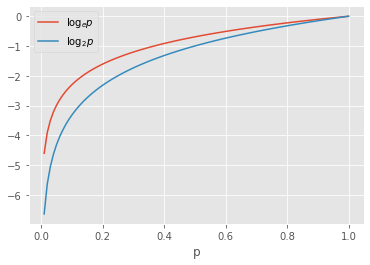

In [19]:
import matplotlib.pyplot as plt

plt.style.use('ggplot')

fig, ax = plt.subplots()

_ = df.log_p.plot(kind='line', ax=ax, label=r'$\log_e p$')
_ = df.log2_p.plot(kind='line', ax=ax, label=r'$\log_2 p$')

_ = ax.set_xlabel('p')
_ = ax.legend()

Now, let's go back to the weather example and assume the following states and probabilities.

- sunny: 0.98
- cloudy: 0.01
- rainy: 0.01

Let's compute the entropy.

In [20]:
probs = [0.98, 0.01, 0.01]
H = -sum([p * np.log(p) for p in probs])
H

0.11190205689093088

Now, let's say the states are nearly equally probable.

- sunny: 0.33
- cloudy: 0.33
- rainy: 0.33

What's the entropy?

In [22]:
probs = [0.33, 0.33, 0.33]
H = -sum([p * np.log(p) for p in probs])
H

1.097575998276395

Again, this simple example is to highlight that high entropy means more uncertainty (more surprise), and low entropy means less uncertainty (less surprise).